In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("traffic_weather_merged.csv")




In [2]:
df.head(10)


,traffic_id,date_time,city,area,vehicle_count,avg_speed_kmh,accident_count,congestion_level,road_condition,visibility_m_traffic,...,humidity,rain_mm,wind_speed_kmh,visibility_m_weather,weather_condition,air_pressure_hpa,day_of_week,is_weekend,hour,is_rush_hour
0,11317,2024-08-22 01:20:00,London,Hammersmith,182,46.1,0,High,Snowy,6210,...,32.0,10.222012,24.637789,6493.0,Storm,989.095139,Thursday,False,1,0
1,11317,2024-08-22 01:20:00,London,Hammersmith,182,46.1,0,High,Snowy,6210,...,87.0,6.573558,58.843766,3709.0,Clear,1017.684702,Thursday,False,1,0
2,9860,2024-08-24 21:05:00,London,Hackney,218,46.1,0,High,Damaged,5049,...,56.0,4.112323,34.582220,5081.0,Fog,1042.611040,Saturday,True,21,0
3,13804,2024-02-12 13:00:00,London,Kensington,197,51.4,0,Low,Dry,5081,...,62.0,0.155574,23.914346,6081.0,Storm,1035.394091,Monday,False,13,0
4,10058,2024-08-22 08:29:00,London,Kensington,198,68.0,0,Low,Damaged,8545,...,82.0,0.838901,17.398239,6954.0,Clear,1016.505342,Thursday,False,8,1
5,13130,2024-02-10 00:10:00,London,Unknown,225,42.1,0,Low,Dry,8722,...,100.0,0.111140,35.276108,50.0,Clear,1022.830704,Saturday,True,0,0
6,9799,2024-09-18 22:00:00,London,Chelsea,185,41.4,0,Low,Damaged,8907,...,52.0,10.730720,29.098811,2478.0,Rain,1022.397876,Wednesday,False,22,0
7,9486,2024-06-19 08:00:00,London,Hammersmith,201,51.6,0,High,Damaged,9025,...,66.0,0.640384,31.150605,50.0,Rain,1014.936350,Wednesday,False,8,1
8,13909,2024-03-28 19:00:00,London,Hackney,178,48.6,0,Medium,Damaged,3828,...,87.0,0.534901,21.653267,1442.0,Rain,1008.727733,Thursday,False,19,1
9,10294,2024-01-03 19:59:00,London,Camden,201,35.4,0,High,Dry,191,...,83.0,14.003790,18.399047,3491.0,Clear,1021.312611,Wednesday,False,19,1


In [3]:
print(df.isnull().sum())


print(df.info())

traffic_id              0
date_time               0
city                    0
area                    0
vehicle_count           0
avg_speed_kmh           0
accident_count          0
congestion_level        0
road_condition          0
visibility_m_traffic    0
weather_id              0
season                  0
temperature_c           0
humidity                0
rain_mm                 0
wind_speed_kmh          0
visibility_m_weather    0
weather_condition       0
air_pressure_hpa        0
day_of_week             0
is_weekend              0
hour                    0
is_rush_hour            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_id            2513 non-null   int64  
 1   date_time             2513 non-null   object 
 2   city                  2513 non-null   object 
 3   area                  

In [4]:
print(df.columns.tolist())


['traffic_id', 'date_time', 'city', 'area', 'vehicle_count', 'avg_speed_kmh', 'accident_count', 'congestion_level', 'road_condition', 'visibility_m_traffic', 'weather_id', 'season', 'temperature_c', 'humidity', 'rain_mm', 'wind_speed_kmh', 'visibility_m_weather', 'weather_condition', 'air_pressure_hpa', 'day_of_week', 'is_weekend', 'hour', 'is_rush_hour']


In [5]:
print(df[['temperature_c','rain_mm','avg_speed_kmh','vehicle_count',
          'visibility_m_weather','humidity','wind_speed_kmh']].describe())

# Calculate thresholds
thresholds = {
    # Weather extremes
    "Heavy rain": df['rain_mm'].quantile(0.90),
    "Temperature low extreme": df['temperature_c'].quantile(0.10),
    "Temperature high extreme": df['temperature_c'].quantile(0.90),
    "Low visibility": df['visibility_m_weather'].quantile(0.10),
    "High humidity": df['humidity'].quantile(0.90),
    "Strong winds": df['wind_speed_kmh'].quantile(0.90),

    # Traffic stress
    "Congestion": df['avg_speed_kmh'].quantile(0.10)
}

# Print thresholds
for scenario, value in thresholds.items():
    print(f"{scenario}: {value:.2f}")

       temperature_c      rain_mm  avg_speed_kmh  vehicle_count  \
count    2513.000000  2513.000000    2513.000000    2513.000000   
mean       13.395178     7.202797      44.722642     199.800239   
std         9.146220    16.963487      11.702269      13.711741   
min       -30.000000     0.001433       7.800000     162.000000   
25%         7.572194     1.421397      36.900000     191.000000   
50%        13.121097     3.541752      44.900000     200.000000   
75%        19.635421     7.165870      52.700000     208.000000   
max        60.000000   120.000000      83.200000     238.000000   

       visibility_m_weather     humidity  wind_speed_kmh  
count           2513.000000  2513.000000     2513.000000  
mean            5308.379228    61.635893       24.010276  
std             3377.210278    19.623079       29.324601  
min               50.000000     0.000000        0.627307  
25%             3030.000000    45.000000       10.506664  
50%             5127.000000    62.000000  

In [6]:
#  Scenario functions using thresholds
def heavy_rain(row):
    return row['rain_mm'] > thresholds["Heavy rain"]

def low_visibility(row):
    return row['visibility_m_weather'] < thresholds["Low visibility"]

def high_humidity(row):
    return row['humidity'] > thresholds["High humidity"]

def strong_winds(row):
    return row['wind_speed_kmh'] > thresholds["Strong winds"]

def cold_temperature(row):
    return row['temperature_c'] < thresholds["Temperature low extreme"]

def hot_temperature(row):
    return row['temperature_c'] > thresholds["Temperature high extreme"]

def congestion_low_speed(row):
    return row['avg_speed_kmh'] < thresholds["Congestion"]

In [7]:
#  Outcome indicators
def accident_indicator(row):
    return row['accident_count'] > 0

def congestion_indicator(row):
    return (row['avg_speed_kmh'] < thresholds["Congestion"]) \
           or (str(row['congestion_level']).strip().title() in ['High', 'Severe'])

In [8]:
# Monte Carlo simulation function 
import numpy as np

def monte_carlo(df, scenario_func, iterations=5000, sample_frac=0.1):
    accident_probs, congestion_probs = [], []
    n = len(df)
    sample_size = max(1, int(sample_frac * n))

    rng = np.random.default_rng(42)  # reproducible

    for _ in range(iterations):
        idx = rng.choice(n, size=sample_size, replace=True)
        sample = df.iloc[idx]

        mask = sample.apply(scenario_func, axis=1)
        scenario_data = sample[mask]

        if scenario_data.empty:
            continue

        acc_prob = scenario_data.apply(accident_indicator, axis=1).mean()
        cong_prob = scenario_data.apply(congestion_indicator, axis=1).mean()

        accident_probs.append(acc_prob)
        congestion_probs.append(cong_prob)

    return np.array(accident_probs), np.array(congestion_probs)

In [9]:
# Define the scenarios dictionary
scenarios = {
    "Heavy rain": heavy_rain,
    "Low visibility": low_visibility,
    "High humidity": high_humidity,
    "Strong winds": strong_winds,
    "Cold temperature": cold_temperature,
    "Hot temperature": hot_temperature,
    "Congestion (low speed)": congestion_low_speed
}


In [12]:
scenario_rows = []

for name, func in scenarios.items():
    mask = df.apply(func, axis=1)
    scenario_data = df[mask].copy()
    scenario_data["Scenario"] = name  # add a column to label scenario
    scenario_rows.append(scenario_data)


all_scenarios_df = pd.concat(scenario_rows, ignore_index=True)

# Save to a single CSV file
all_scenarios_df.to_csv("simulation_results.csv", index=False)


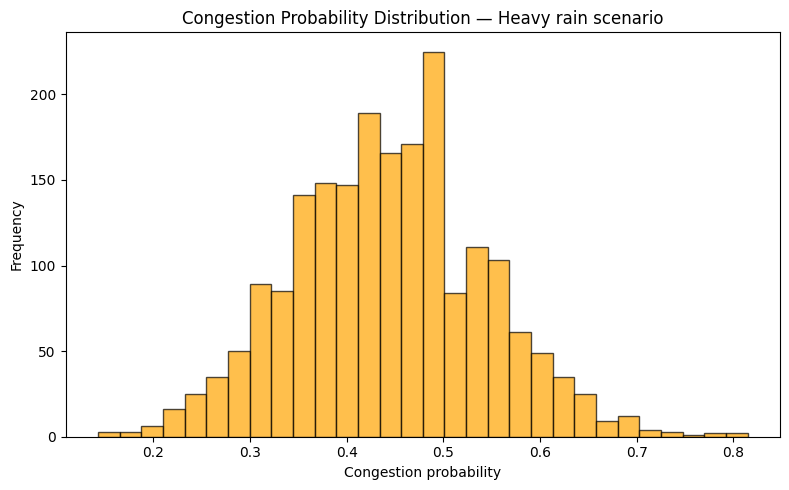

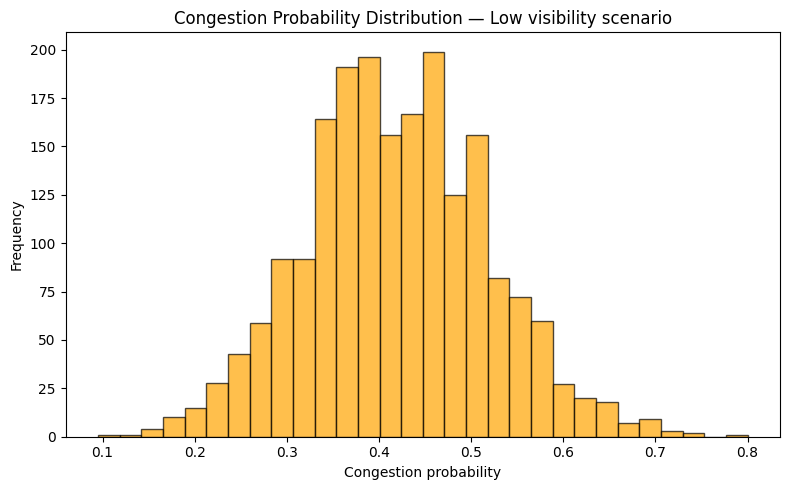

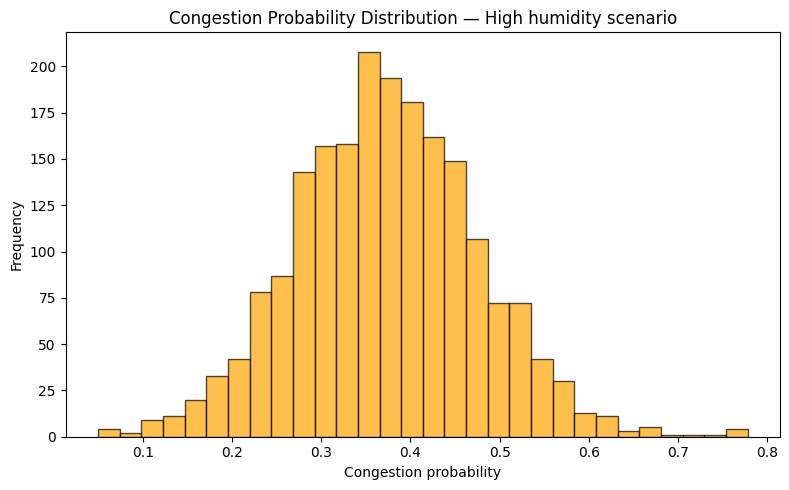

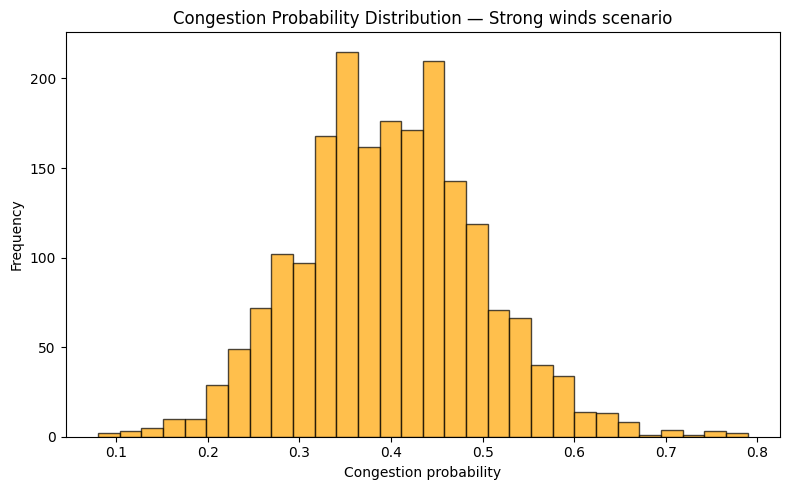

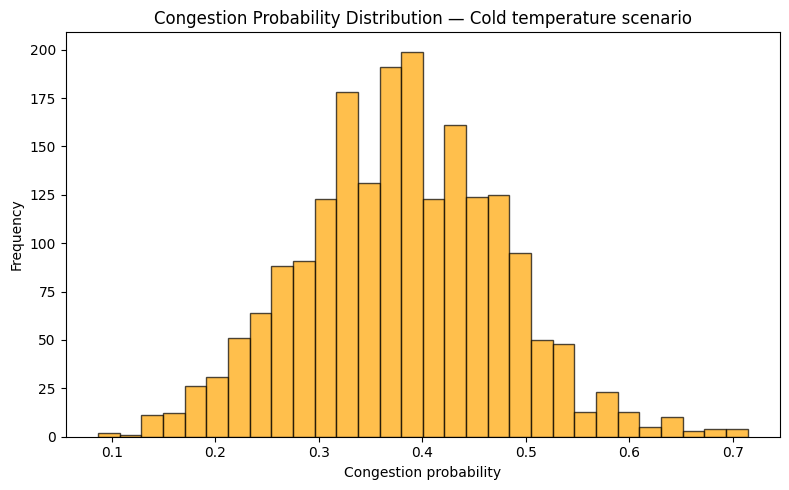

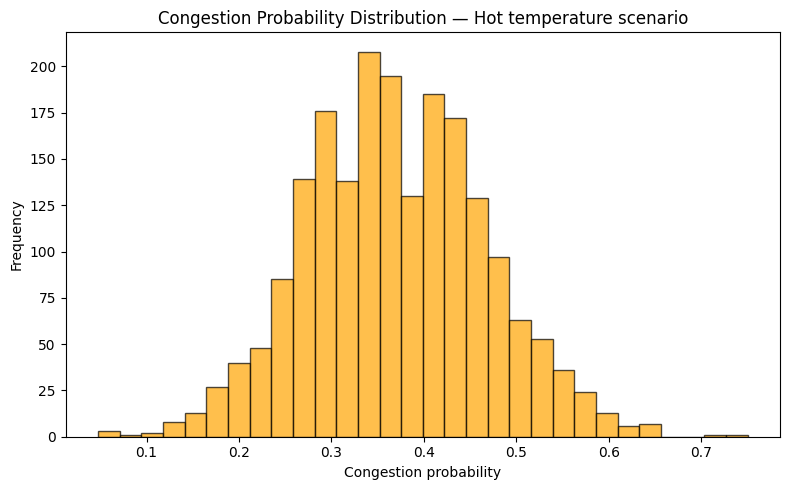

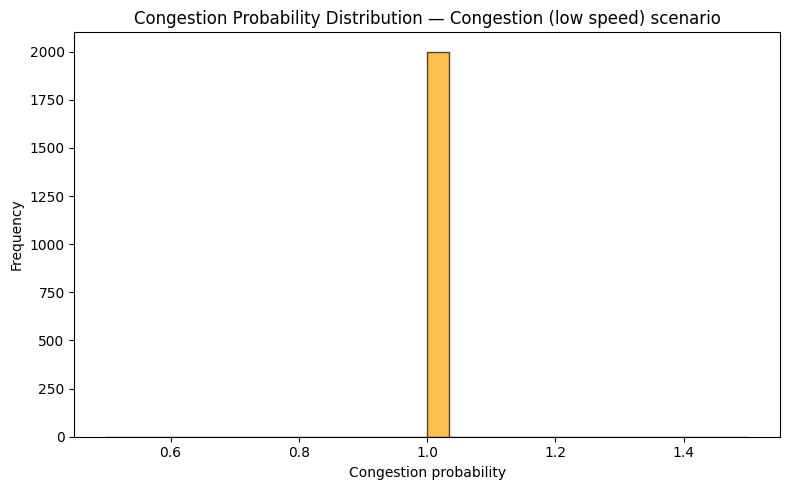

In [11]:
# Loop through each scenario and plot only congestion probability distributions
for name, func in scenarios.items():
    acc_probs, cong_probs = monte_carlo(df, func, iterations=2000)
    
    if cong_probs.size:  
        plt.figure(figsize=(8,5))
        plt.hist(cong_probs, bins=30, alpha=0.7, color="orange", edgecolor="black")
        plt.title(f"Congestion Probability Distribution — {name} scenario")
        plt.xlabel("Congestion probability")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()
